In [244]:
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.grid'] = False
plt.style.use('seaborn-darkgrid')

In [245]:
data_2 = pd.read_csv('../output/video_csi.csv')
# checking our dataframe once again
data_2 = data_2.drop([data_2.columns[0]], axis='columns')
data_2.head()

,Subcar_1,Subcar_2,Subcar_3,Subcar_4,Subcar_5,Subcar_6,Subcar_7,Subcar_8,Subcar_9,Subcar_10,...,Subcar_44,Subcar_45,Subcar_46,Subcar_47,Subcar_48,Subcar_49,Subcar_50,Subcar_51,Subcar_52,Label
0,197.022841,222.611770,298.824363,345.092741,386.865610,460.408514,507.410091,658.663040,709.626662,761.396743,...,598.792952,571.161098,556.400036,553.971118,578.993091,620.966988,658.089660,693.333974,725.385415,1
1,185.180993,203.246156,225.375243,265.685905,326.585364,376.017287,418.951071,513.857957,567.275947,621.003221,...,465.288083,456.508488,458.216106,460.214081,474.090709,505.929837,531.919167,516.980657,505.831988,1
2,275.181758,254.880364,246.032518,278.411566,311.770749,356.561355,411.325905,531.372751,588.210847,623.682612,...,487.155006,470.227604,458.851828,454.059467,481.814280,515.873046,549.615320,564.156007,571.360657,1
3,223.329353,242.441746,290.800619,331.798131,390.988491,458.039300,514.008755,641.891735,715.690576,783.649156,...,571.686103,561.663600,547.153543,548.426841,577.257308,609.407089,652.345001,700.668966,744.492445,1
4,144.474911,180.709712,233.790504,284.541737,331.581061,381.693594,451.707870,608.240084,680.307284,738.823389,...,509.039291,510.309710,487.689450,504.239031,534.344458,586.291736,620.220122,661.725774,706.785682,1


In [246]:
X_data = data_2.iloc[:, 1:]
target = data_2.iloc[:, -1]

In [247]:
x_train, x_valid, y_train, y_valid = train_test_split(
    X_data, target,  test_size=0.20, random_state=120, shuffle=False)  # false for timeseries
print('x_train.shape: ', x_train.shape)
print('x_valid.shape: ', x_valid.shape)
print('y_train.shape: ', y_train.shape)
print('y_valid.shape: ', y_valid.shape)

x_train.shape:  (24628, 52)
x_valid.shape:  (6158, 52)
y_train.shape:  (24628,)
y_valid.shape:  (6158,)


In [248]:
x_valid, x_test, y_valid, y_test = train_test_split(
    x_valid, y_valid,  test_size=0.50, random_state=120, shuffle=False)  # false for timeseries
print('x_valid.shape: ', x_valid.shape)
print('y_valid.shape: ', y_valid.shape)
print('x_test.shape: ', x_test.shape)
print('y_test.shape: ', y_test.shape)

x_valid.shape:  (3079, 52)
y_valid.shape:  (3079,)
x_test.shape:  (3079, 52)
y_test.shape:  (3079,)


In [249]:
# Scaling
standardizer = StandardScaler()
data_scaled = standardizer.fit_transform(X_data)
data_scaled
print(data_scaled)

[[ 1.7279053   2.6273626   3.0296812  ...  1.06860346  1.08827168
   1.04200401]
 [ 1.53351118  1.85697108  2.21160618 ...  0.64027144  0.57304334
   1.04200401]
 [ 2.05182094  2.07364066  2.34271008 ...  0.75485229  0.72682016
   1.04200401]
 ...
 [-0.50002294 -0.50241522 -0.52323242 ... -0.61871445 -0.6166865
  -0.9596892 ]
 [-0.49859264 -0.49964486 -0.51952022 ... -0.61382749 -0.61211423
  -0.9596892 ]
 [-0.50046342 -0.49903317 -0.5175493  ... -0.61890961 -0.61677419
  -0.9596892 ]]


In [250]:
x_test_scaled = standardizer.transform(x_test)
x_test_scaled

array([[-0.50971912, -0.51013568, -0.52906068, ..., -0.61478324,
        -0.61358149,  1.04200401],
       [-0.50780837, -0.50815553, -0.52650543, ..., -0.61498584,
        -0.61423769,  1.04200401],
       [-0.50012822, -0.50020797, -0.52002249, ..., -0.61590166,
        -0.61372841,  1.04200401],
       ...,
       [-0.50002294, -0.50241522, -0.52323242, ..., -0.61871445,
        -0.6166865 , -0.9596892 ],
       [-0.49859264, -0.49964486, -0.51952022, ..., -0.61382749,
        -0.61211423, -0.9596892 ],
       [-0.50046342, -0.49903317, -0.5175493 , ..., -0.61890961,
        -0.61677419, -0.9596892 ]])

In [251]:
x_train = x_train.values.reshape(24628, 52, 1)
x_valid = x_valid.values.reshape(3079, 52, 1)
x_test = x_test.values.reshape(3079, 52, 1)
print('X_train.shape: ', x_train.shape)
print('x_valid.shape: ', x_valid.shape)
print('x_test.shape: ', x_test.shape)

X_train.shape:  (24628, 52, 1)
x_valid.shape:  (3079, 52, 1)
x_test.shape:  (3079, 52, 1)


In [252]:
# Set up parameters
n_steps = 64
n_features = 1

tf.random.set_seed(2)
# Create a traditional RNN network
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
        128, input_shape=(n_steps, n_features), return_sequences=True)),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer='l1'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [253]:
cp1 = ModelCheckpoint('../save/bi_csimodel/', save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    mode='min'
)
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[
                  tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                  tf.keras.metrics.Precision(name='precision'),
                  tf.keras.metrics.Recall(name='recall')
])

In [254]:
history_1 = model.fit(x_train, y_train, validation_data=(
    x_valid, y_valid), epochs=15, batch_size=810, callbacks=[early_stopping, cp1])

Epoch 1/15
31/31 [==============================] - ETA: 0s - loss: 3.9766 - accuracy: 0.7385 - precision: 0.8203 - recall: 0.6977WARNING:tensorflow:From c:\Users\Owner\anaconda3\envs\Tensorflow210\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ../save/bi_csimodel\assets
31/31 [==============================] - 68s 2s/step - loss: 3.9766 - accuracy: 0.7385 - precision: 0.8203 - recall: 0.6977 - val_loss: 3.4918 - val_accuracy: 0.6642 - val_precision: 0.2506 - val_recall: 0.6600
Epoch 2/15
31/31 [==============================] - 82s 3s/step - loss: 2.7840 - accuracy: 0.8209 - pr

In [255]:
best_score = max(history_1.history['accuracy'])
print(best_score)

0.9998781681060791


In [256]:
history_1.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

In [257]:
def vis(history, name):
    plt.title(f"{name.upper()}", fontsize=20)
    plt.xlabel('epochs', fontsize=20)
    plt.ylabel(f"{name.lower()}", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}", None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None:
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(
        0.05, 1.2), fontsize=20, ncol=1)


def plot_history(history):
    key_value = list(set([i.split("val_")[-1]
                     for i in list(history.history.keys())]))
    plt.figure(figsize=(20, 8))
    for idx, key in enumerate(key_value):
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()

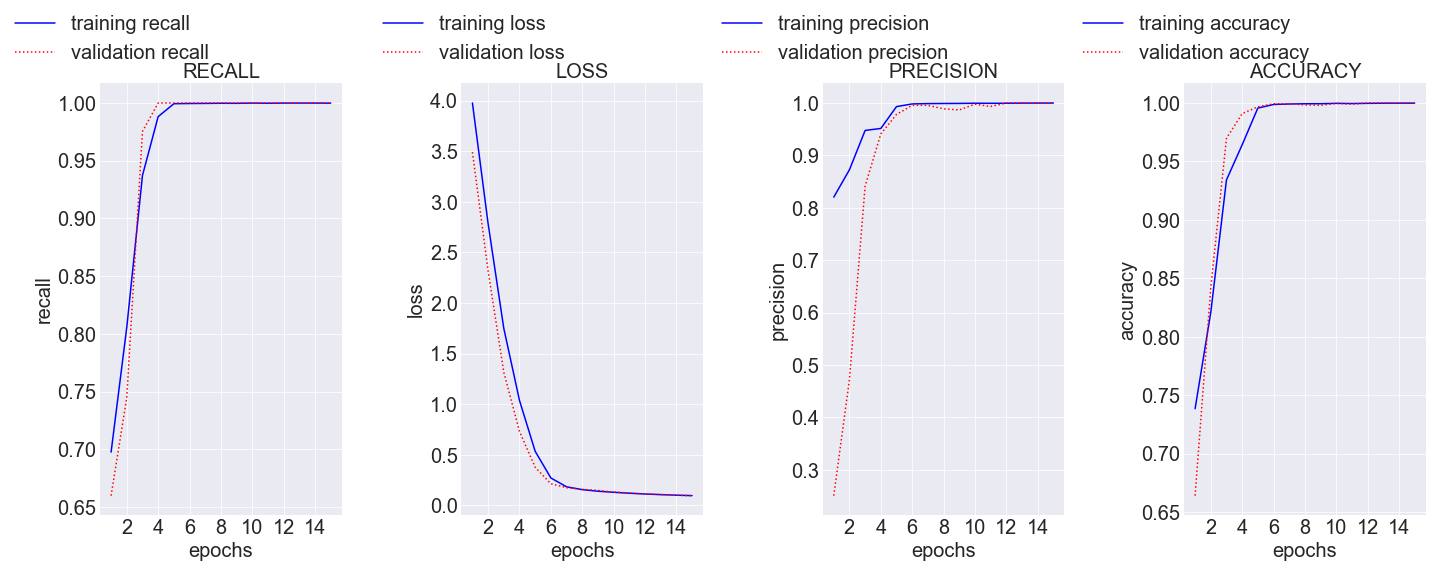

In [258]:
plot_history(history_1)

In [259]:
y_pred = model.predict(x_test, verbose=0)
y_pred


array([[0.9805825 ],
       [0.9805657 ],
       [0.9805559 ],
       ...,
       [0.02157834],
       [0.02222729],
       [0.02172092]], dtype=float32)

No handles with labels found to put in legend.


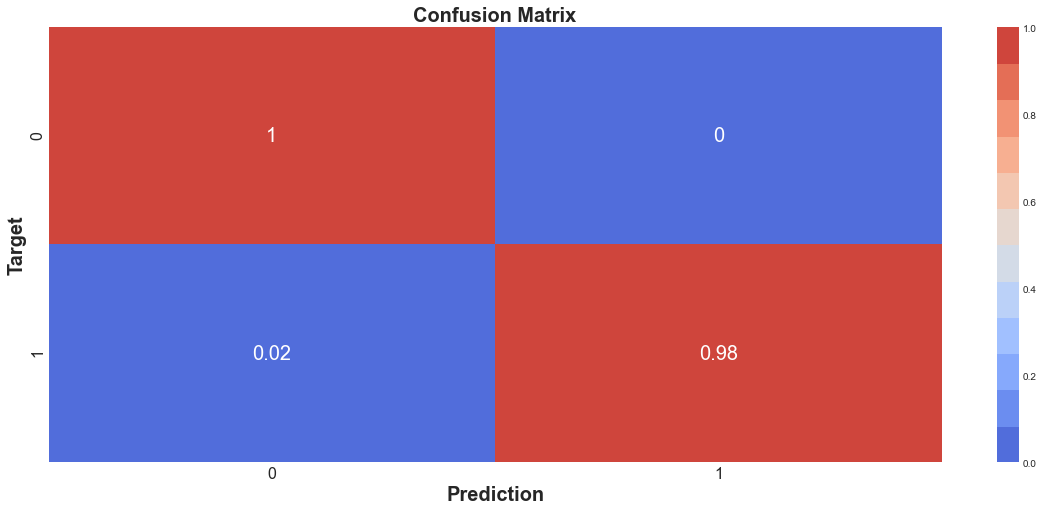

In [260]:
cm = confusion_matrix(y_test, y_pred.round())
cm = np.around(cm.astype(
    'float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
plt.figure()
colormap = sns.color_palette("coolwarm", 12)
sns.heatmap(cm, cmap=colormap, annot=True, annot_kws={"size": 20})
plt.xlabel('Prediction', fontsize=20, fontweight='bold',
           horizontalalignment='center')
plt.ylabel('Target', fontsize=20, fontweight='bold',
           horizontalalignment='center')
plt.title('Confusion Matrix', fontsize=20, fontweight='bold',
          horizontalalignment='center')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=13)


In [261]:
tf.random.set_seed(2)
gru_model = tf.keras.Sequential([
    tf.keras.layers.GRU(128, input_shape=(
        n_steps, n_features), return_sequences=True),
    tf.keras.layers.SimpleRNN(52, 'relu', kernel_regularizer='l1'),
    tf.keras.layers.Dense(1, 'sigmoid')
])


In [262]:
cp2 = ModelCheckpoint('../save/gru_csimodel/', save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    mode='min'
)

gru_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=[
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
])

In [263]:
history_2 = gru_model.fit(x_train, y_train, validation_data=(
    x_valid, y_valid), epochs=18, batch_size=810, callbacks=[early_stopping, cp2])

Epoch 1/18
31/31 [==============================] - ETA: 0s - loss: 5.7153 - accuracy: 0.7723 - precision: 0.8252 - recall: 0.7658WARNING:tensorflow:Model was constructed with shape (None, 64, 1) for input Tensor("gru_5_input:0", shape=(None, 64, 1), dtype=float32), but it was called on an input with incompatible shape (None, 52, 1).
INFO:tensorflow:Assets written to: ../save/gru_csimodel\assets
31/31 [==============================] - 33s 1s/step - loss: 5.7153 - accuracy: 0.7723 - precision: 0.8252 - recall: 0.7658 - val_loss: 4.7960 - val_accuracy: 0.8636 - val_precision: 0.9655 - val_recall: 0.0626
Epoch 2/18
31/31 [==============================] - 37s 1s/step - loss: 3.9973 - accuracy: 0.7569 - precision: 0.8804 - recall: 0.6674 - val_loss: 3.4411 - val_accuracy: 0.7207 - val_precision: 0.3375 - val_recall: 0.9597
Epoch 3/18
31/31 [==============================] - 37s 1s/step - loss: 2.7191 - accuracy: 0.8324 - precision: 0.8850 - recall: 0.8140 - val_loss: 2.1885 - val_accuracy

In [264]:
best_score = max(history_2.history['accuracy'])
print(best_score)

0.999756395816803


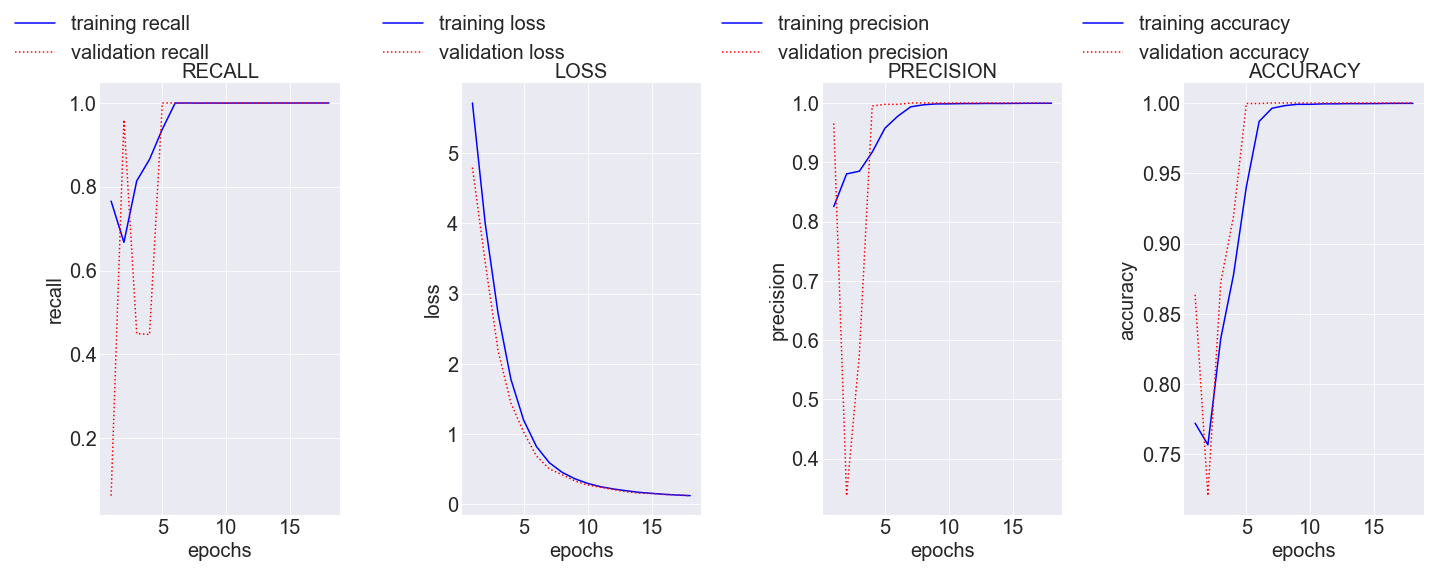

In [265]:
plot_history(history_2)


In [266]:
y_pred_2 = gru_model.predict(x_test, verbose=0)
y_pred_2


array([[0.95601815],
       [0.93518066],
       [0.97797143],
       ...,
       [0.02162829],
       [0.03745526],
       [0.11781147]], dtype=float32)

No handles with labels found to put in legend.


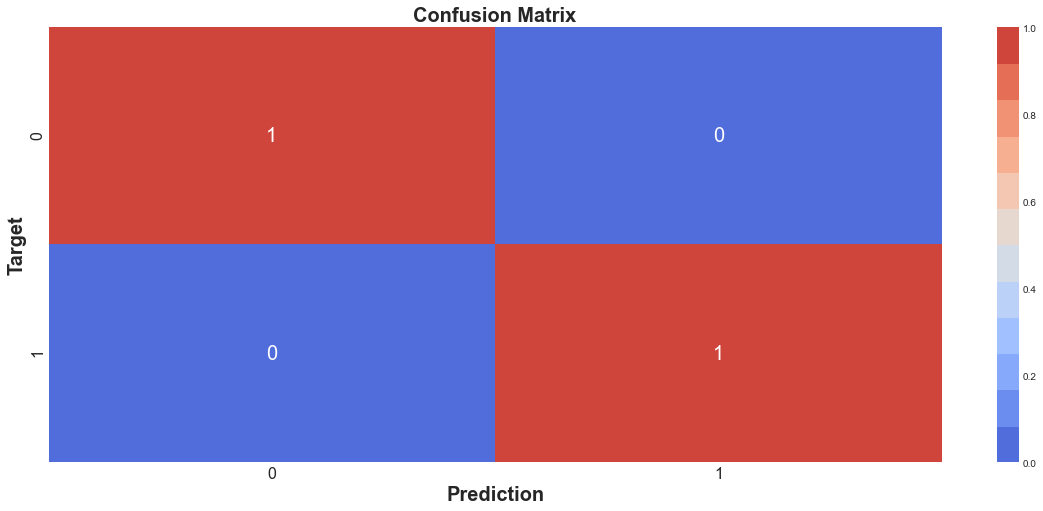

In [267]:
cm = confusion_matrix(y_test, y_pred_2.round())
cm = np.around(cm.astype(
    'float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
plt.figure()
colormap = sns.color_palette("coolwarm", 12)
sns.heatmap(cm, cmap=colormap, annot=True, annot_kws={"size": 20})
plt.xlabel('Prediction', fontsize=20, fontweight='bold',
           horizontalalignment='center')
plt.ylabel('Target', fontsize=20, fontweight='bold',
           horizontalalignment='center')
plt.title('Confusion Matrix', fontsize=20, fontweight='bold',
          horizontalalignment='center')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=13)


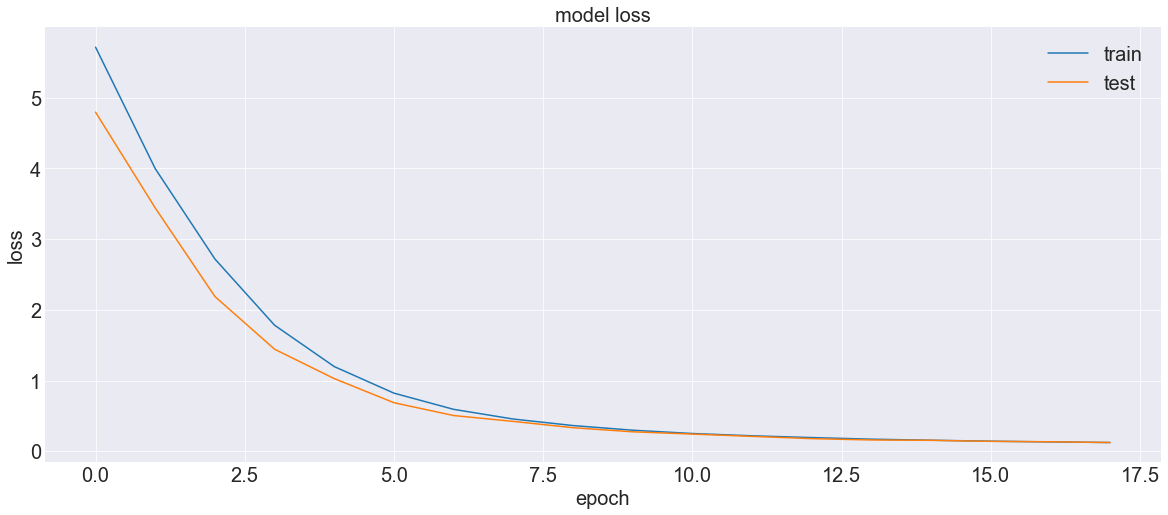

In [268]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['train', 'test'], loc='upper right', fontsize=20)
plt.show()


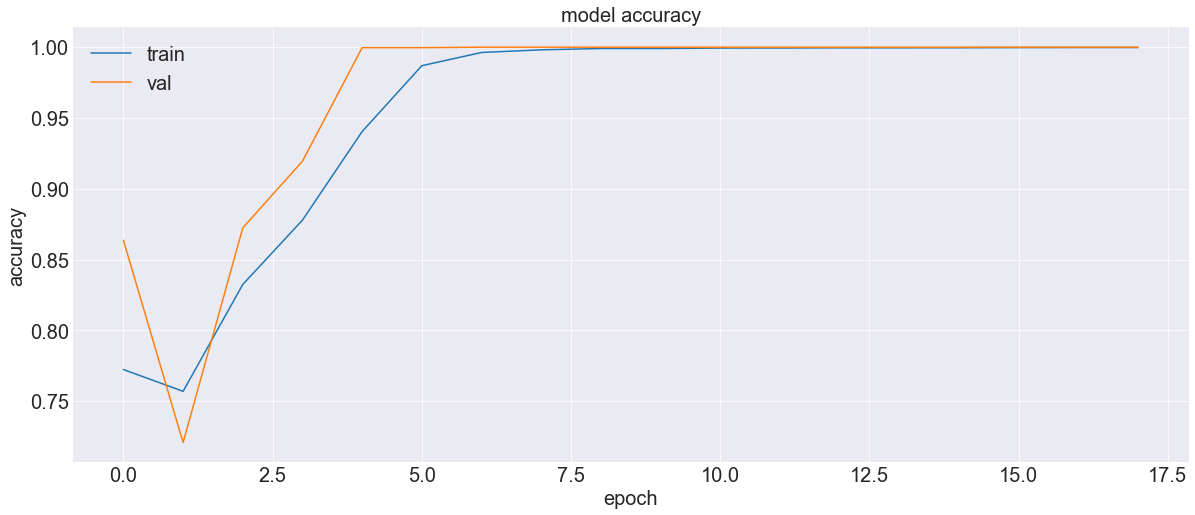

In [269]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy',  fontsize=20)
plt.ylabel('accuracy', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['train', 'val'], loc='upper left', fontsize=20)
plt.show()
